In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
import statsmodels.stats.diagnostic as smd
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

In [20]:
df = pd.read_csv("C:/Users/SCIENCE/Documents/TITANIC.CSV")
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,fare,SibSp,Parch,Ticket,Fare,Cabin,Embarked
794,795,0,3,"Dantcheff, Mr. Ristiu",male,790,0,0,349203,7.8958,25,S
795,796,0,2,"Otter, Mr. Richard",male,1300,0,0,28213,13.0000,25,S
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,2593,0,0,17465,25.9292,D17,S
797,798,1,3,"Osman, Mrs. Mara",female,869,0,0,349244,8.6833,25,S
798,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,723,0,0,2685,7.2292,25,C


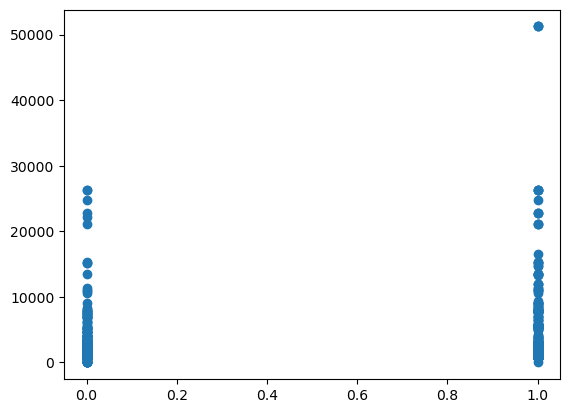

In [14]:
plt.scatter(df.Survived, df.fare)

In [31]:
model = smf.ols(formula="fare~Fare+Pclass+Survived", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.833e+10
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:35:34   Log-Likelihood:                -225.51
No. Observations:                 799   AIC:                             459.0
Df Residuals:                     795   BIC:                             477.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0113      0.048     -0.234      0.815      -0.106       0.083
Fare         100.0011      0.000   3.74e+05      0.000     100.001     100.002
Pclass         0.1166      0.017      6.912      0.000       0.083       0.150
Survived      -0.0516      0.025     -2.081      0.038      -0.100      -0.003
==============================================================================
Omnibus:                       80.297   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.423
Skew:                           0.868   Prob(JB):                     5.74e-23
Kurtosis:                       2.746   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df=pd.DataFrame(columns=("LM stat", "LM p", "F stat", "F stat p"))
output_df.loc["white"] = white_test
output_df.loc["Breusch Pagan"] = breuschpagan_test
output_df

,LM stat,LM p,F stat,F stat p
white,39.539950,0.000004,5.141245,0.000003
Breusch Pagan,22.543815,0.000050,7.694073,0.000045


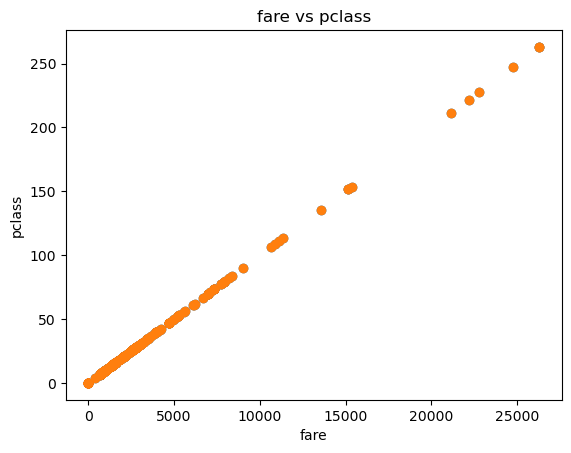

In [6]:
df_Survived = df[df["Survived"]==1]
df_Survived = df[df["Survived"]==0]

plt.scatter(df_Survived.fare,df_Survived.Fare)
plt.scatter(df_Survived.fare,df_Survived.Fare)
plt.title("fare vs pclass")
plt.xlabel("fare")
plt.ylabel("pclass")
plt.show()

In [18]:
wh=het_white(model.resid, model.model.exog)
wh

(39.53995003770775,
 3.90185932072363e-06,
 5.141244844172517,
 2.882143321384884e-06)

In [24]:
brs=het_breuschpagan(model.resid,model.model.exog)
brs

(22.54381467720901,
 5.02628798282171e-05,
 7.694073409920494,
 4.514385559287887e-05)

In [22]:
model.conf_int()

,0,1
Intercept,-0.105877,0.083364
Fare,100.000590,100.001640
Pclass,0.083462,0.149663
Survived,-0.100357,-0.002921


In [30]:
### In case of Heteroskedasticity use Robust Standard Errors to correct it which makes the F-P-Value to inrease thus accepting H0
ols_robust=smf.ols(formula="fare~Fare+Pclass+Survived", data=df).fit(cov_type="HC0")
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.909e+10
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:34:51   Log-Likelihood:                -225.51
No. Observations:                 799   AIC:                             459.0
Df Residuals:                     795   BIC:                             477.8
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0113      0.050     -0.224      0.823      -0.110       0.087
Fare         100.0011      0.000   2.81e+05      0.000     100.000     100.002
Pclass         0.1166      0.017      6.687      0.000       0.082       0.151
Survived      -0.0516      0.024     -2.154      0.031      -0.099      -0.005
==============================================================================
Omnibus:                       80.297   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.423
Skew:                           0.868   Prob(JB):                     5.74e-23
Kurtosis:                       2.746   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [32]:
ols_robust.conf_int()

,0,1
Intercept,-0.109612,0.087098
Fare,100.000418,100.001812
Pclass,0.082397,0.150728
Survived,-0.098620,-0.004658


In [ ]:
white_test = het_white(ols_robust.resid, ols_robust.ols_robust.exog)
breuschpagan_test = het_breuschpagan(ols_robust.resid, ols_robust.ols_robust.exog)

output_df=pd.DataFrame(columns=("LM stat", "LM p", "F stat", "F stat p"))
output_df.loc["white"] = white_test
output_df.loc["Breusch Pagan"] = breuschpagan_test
output_df